# Importing Libraries

In [59]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import seaborn as sns

# EDA

In [3]:
df = pd.read_csv('./winemag-data_first150k.csv', index_col='Unnamed: 0')
df.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150930 entries, 0 to 150929
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   country      150925 non-null  object 
 1   description  150930 non-null  object 
 2   designation  105195 non-null  object 
 3   points       150930 non-null  int64  
 4   price        137235 non-null  float64
 5   province     150925 non-null  object 
 6   region_1     125870 non-null  object 
 7   region_2     60953 non-null   object 
 8   variety      150930 non-null  object 
 9   winery       150930 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 12.7+ MB


In [37]:
df["country"] = df["country"].astype('category')

In [38]:
# drop unknown price
df.dropna(subset=["price"], inplace=True)

# fill the missing value with blank
df.fillna("", inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 137235 entries, 0 to 150929
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype   
---  ------       --------------   -----   
 0   country      137235 non-null  category
 1   description  137235 non-null  object  
 2   designation  137235 non-null  object  
 3   points       137235 non-null  int64   
 4   price        137235 non-null  float64 
 5   province     137235 non-null  object  
 6   region_1     137235 non-null  object  
 7   region_2     137235 non-null  object  
 8   variety      137235 non-null  object  
 9   winery       137235 non-null  object  
dtypes: category(1), float64(1), int64(1), object(7)
memory usage: 10.6+ MB


In [33]:
df.describe()

,points,price
count,137235.000000,137235.000000
mean,87.787919,33.131482
std,3.221680,36.322536
min,80.000000,4.000000
25%,86.000000,16.000000
50%,88.000000,24.000000
75%,90.000000,40.000000
max,100.000000,2300.000000


## What country, region, and wineray produce most wines?

### Creating Pareto Plot

In [65]:
# Prepare data for pareto plot
count_df = pd.DataFrame(df[["country"]].value_counts())
count_df.rename(columns={0:"count"}, inplace=True)

# Add column to show cumulative percentage
count_df["cumprec"] = count_df["count"].cumsum()/count_df["count"].sum()*100
count_df.reset_index(inplace=True)
count_df

,country,count,cumprec
0,US,62139,45.279265
1,Italy,18784,58.966736
2,France,14785,69.740227
3,Spain,8160,75.686232
4,Chile,5766,79.887784
5,Argentina,5587,83.958903
6,Australia,4894,87.525048
7,Portugal,4176,90.568004
8,New Zealand,3070,92.805042
9,Austria,2483,94.614348


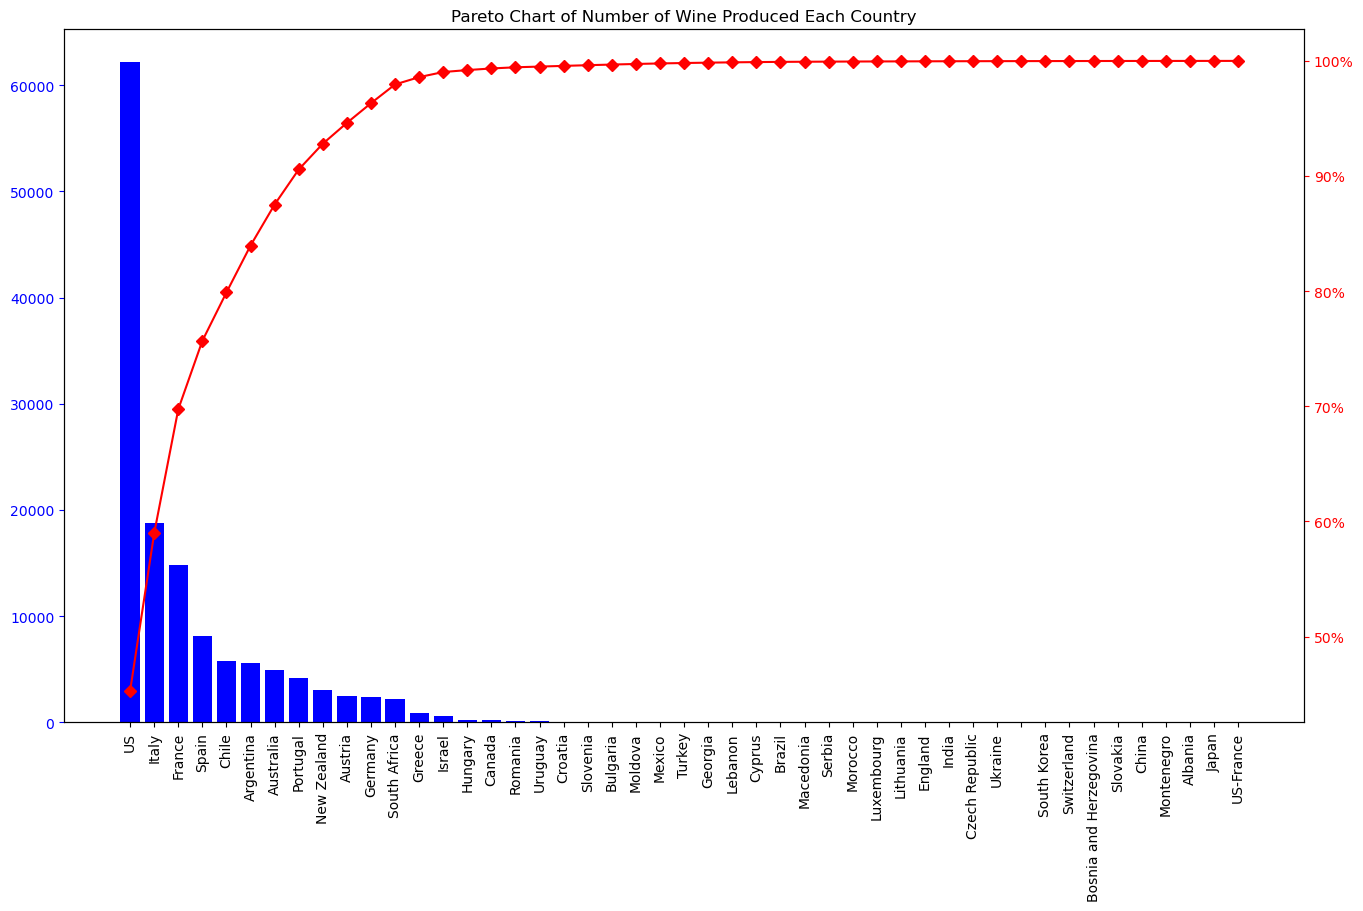

As show in the chart, around 80% of number of wine were produced from US, Italy, France, Chile and Argentina.


In [90]:
# Define color
color_bar = 'blue'
color_line = 'red'

# Create bar plot
fig, ax= plt.subplots(figsize=(16,9))
ax.bar(count_df["country"], count_df["count"], color = color_bar)

# Add line plot 
ax2 = ax.twinx()
ax2.plot(count_df["country"], count_df["cumprec"], color=color_line, marker="D")
ax2.yaxis.set_major_formatter(PercentFormatter())

#specify axis colors
ax.tick_params(axis='y', colors=color_bar)
ax2.tick_params(axis='y', colors=color_line)

# Rotating X-axis labels
for tick in ax.get_xticklabels():
    tick.set_rotation(90)

plt.title("Pareto Chart of Number of Wine Produced Each Country")
plt.show()

print("As show in the chart, around 80% of number of wine were produced from US, Italy, France, Chile and Argentina.")